<h1><b><center>Salário Mensal do Servidor Público no Brasil</center></b></h1>

---
<font size="2" face="Verdana"> O funcionarismo público tem sido por muitos anos a carreira que mais bem paga no mercado, muitas pessoas buscam como objetivo de vida, serem aprovados em concursos públicos. De fato é uma área que possui muitos benefícios e o governo tem por obrigação publicizar todos os dados e informações no que tange ao orçamento público a fim de manter a transparência para o contribuinte.
    
O Estado de **São Paulo**, objeto desta análise, abriga uma grande maioria de todo o funcionalismo público, principalmente por sua importância econômica para o país. Desta forma ao analisar os dados apresentados é possível identificar uma composição bem extensa de setores e áreas que englobam tais funcionários.

Disto isso, apresento a seguir uma análise sobre a remuneração mensal, correspondente ao ano de 2017 dos servidores públicos do estado de São Paulo.
    

Por: **Felipe Alves Cardozo**
</font>

<p  align=center><br><img src='https://www.rapidocard.com.br/images/crachas-funcionarios-publicos.jpg' widht='100%' hight='40%'></p>

# Importação dos Dados

<font size="2" face="Verdana"> Como dito anteriormente, neste Projeto, irei analisar os dados de **Salários Mensais de Servidores Públicos** do estado de São Paulo do mês de outubro e do ano de **2017**, com base nos dados disponibilizados no kaggle, buscarei responder algumas perguntas como: 
    
* Qual o cargo com maior e menor salário Mensal?
* Qual o cargo com maior e menor salário Total?    
* Qual o cargo mais presente no Dataset?
* Qual o setor mais presente no Dataset?
    
Além de outras perguntas...
    
Farei também algumas representações gráficas dos dados, seguindo a convenção de **Storytelling**, proposta pela autora Cole Nussbaumer Knaflic, em seu livro de nome **Storytellyng com Dados**
    
Os dados podem ser obtidos clicando neste [Link](https://www.kaggle.com/datasets/gustavomodelli/monthly-salary-of-public-worker-in-brazil), ou diretamente no [Portal da Transparência](http://www.transparencia.sp.gov.br/buscaRemunera.html)
</font>

<font size="2" face="Verdana">O primeiro passo é a Importação das bibliotecas a serem utilizadas, no caso do presente projeto, importaremos a biblioteca **Pandas**, **Matplotlib**, **Seaborn**, **csv** e **warnings** </font>

In [221]:
# Importando as Libs necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import warnings

warnings.filterwarnings('ignore') # Configuração para ignorar alertas
pd.options.display.float_format='{:2f}'.format # Format

<font size="2" face="Verdana"> O Dataset  no qual trabalharei é composto por um arquivo com **Dez** colunas, dos quais representam os seguintes significados: 
    
**Dicionário das Váriáveis**
 
1. `id:` São identificadores criados para anonimização dos dados
2. `job:` Identifica o nome do cargo exercido
3. `sector:` É o setor no qual o funcionário exerce o cargo
4. `monthy_salary:` Salário mensal do funcionário
5. `13_salary:` Corresponde ao 13º salário 
6. `eventual_salary:` Representa algum ganho em bônus
7. `indeminity:` Corresponde a alguma indenização que o funcionário possa ter recebido
8. `extra_salary:` Corresponde a algum salário extra que o funcionário possa ter recebido
9. `discount_salary:` Algum desconto que possa ter sido aplicado no salário
10. `total_salary:` Salário total incluindo bonificações e descontos
    
    
</font> 

<font size="2" face="Verdana"> <p style="color:red">**Importante!** </p><br>
Antes da importação do Dataset, percebi uma inconsistência em algumas colunas. Alguns cargos na coluna **job** tem em sua descrição uma vírgula no meio do cargo, por exemplo: **"TEC MANUT., PROJETOS E OBRAS"**, isso acaba se tornando um problema e impedindo a correta leitura, pois as demais colunas são separadas por vírgulas no arquivo, com essa vírgula no meio do cargo a coluna seguinte é preenchida com o dado e "empurra" as informações das outras colunas, gerando uma coluna extra não mapeada por um cabeçalho.
    
Para reverter isso escolhi trabalhar com a biblioteca **csv** tendo em vista que o pandas já tenta abrir o arquivo como primeira ação.
</font> 

In [30]:
# lendo o dataset e atribuindo a uma variável
with open('monthly_salary_brazil.csv', 'r') as arquivo:
    dados = arquivo.read()

<font size="2" face="Verdana"> Em seguida, após identificar que apenas 4 cargos apresentavam o problema, realizei a substituição do texto errado, com a virgula, para o texto correto, sem virgula. Logo em seguida, criei um novo arquivo com os dados corrigidos.
</font> 

In [32]:
# Alterando os cargos incorretos 
# Cargos antigos com erro
Cargo01 = "TEC MANUT., PROJETOS E OBRAS"
Cargo02 = "TEC MANUT, PROJETOS E OBRAS"
Cargo03 = "ESPEC EM PLAN EDUC,OBR E GESTAO"
Cargo04 = "SUPERVISOR-DES PES,CARGOS SAL"

# Novos cargos corrigidos
CorrecaoCargo01 = "TEC MANUT PROJETOS E OBRAS"
CorrecaoCargo02 = "TEC MANUT PROJETOS E OBRAS"
CorrecaoCargo03 = "ESPEC EM PLAN EDUC OBR E GESTAO"
CorrecaoCargo04 = "SUPERVISOR-DES PES CARGOS SAL"

# Alterando as informações de cargo 
dados = dados.replace(Cargo01,CorrecaoCargo01)
dados = dados.replace(Cargo02,CorrecaoCargo02)
dados = dados.replace(Cargo03,CorrecaoCargo03)
dados = dados.replace(Cargo04,CorrecaoCargo04)


# Salvando o arquivo corrigido
with open(r'monthly_salary_brazil.csv', 'w') as arquivo:
    arquivo.write(dados)

<font size="2" face="Verdana"> Agora sim, com a correção poderei trabalhar com a biblioteca pandas a fim de manipular os dados com mais ferramentas.
</font> 

In [222]:
# Lendo os dados alterado com o Pandas
dataset = pd.read_csv('monthly_salary_brazil.csv');

# Verificando o dataset
dataset.head()

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
0,1,OFICIAL ADMINISTRATIVO,DETRAN,2315.810000,0.000000,0.000000,0.000000,73.850000,0.000000,1929.340000
1,2,SD 2C PM,PM,3034.050000,0.000000,0.000000,0.000000,651.820000,0.000000,2265.960000
2,3,1TEN PM,PM,8990.980000,0.000000,0.000000,0.000000,626.750000,0.000000,6933.040000
3,4,MAJ PM,SPPREV,13591.020000,0.000000,0.000000,0.000000,0.000000,0.000000,10568.360000
4,5,AG.TEC. DE ASSIT. A SAUDE,HCFMUSP,4203.670000,0.000000,0.000000,0.000000,0.000000,0.000000,3561.880000


# Análise Exploratória dos Dados

O Dataset em questão possui **1.085.678** linhas e **10** colunas, representando dados de **salários de funcionários públicos** do mês de **Outubro** do ano de **2017** do estado de **São Paulo**.

In [223]:
# Exibindo as informações de dimensão dos dados
print('DIMENSÕES DO DATAFRAME: \n')
print(f'O dataset Possui {dataset.shape[0]} Linhas')
print(f'O dataset Possui {dataset.shape[1]} Colunas')

DIMENSÕES DO DATAFRAME: 

O dataset Possui 1085678 Linhas
O dataset Possui 10 Colunas


<font size="2" face="Verdana">Utilizando o método **info()** vemos que o Dataset **não** possui valores completos na coluna **job**, este é um resumo mais abrangente das informações dos dados, destacando o índice, o nome, a contagem total de valores não nulos e os tipos de cada coluna, nesta respectiva ordem.</font>

In [42]:
# Resumo Geral das informações do Dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1085678 entries, 0 to 1085677
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Id               1085678 non-null  int64  
 1   job              1085650 non-null  object 
 2   sector           1085678 non-null  object 
 3   Month_salary     1085678 non-null  float64
 4   13_salary        1085678 non-null  float64
 5   eventual_salary  1085678 non-null  float64
 6   indemnity        1085678 non-null  float64
 7   extra_salary     1085678 non-null  float64
 8   discount_salary  1085678 non-null  float64
 9   total_salary     1085678 non-null  float64
dtypes: float64(7), int64(1), object(2)
memory usage: 82.8+ MB


<font size="2" face="Verdana">Com o método **isnull()** e utilizando a soma dos valores nulos vemos que a coluna **job**, Possui **28 linhas faltantes**.</font>

In [44]:
# Conferindo os valores nulos
dataset.isnull().sum()

Id                  0
job                28
sector              0
Month_salary        0
13_salary           0
eventual_salary     0
indemnity           0
extra_salary        0
discount_salary     0
total_salary        0
dtype: int64

<font size="2" face="Verdana">Como o Dataset possui mais de **1 milhão** de registros e nenhuma outra coluna faltantes escolhi a remoção das linhas sem dados na coluna **job**.</font>

In [46]:
# removendo valores nulos
shape_antes = dataset.shape
print('Antes:\t ', shape_antes)

dataset.dropna(subset=['job'], inplace=True)

shape_depois = dataset.shape
print('Depois:\t ', shape_depois)

Antes:	  (1085678, 10)
Depois:	  (1085650, 10)


<font size="2" face="Verdana">Conferindo novamente vê-se que o dataset **não possui** mais nenhum valor nulo.</font>

In [47]:
# Conferindo novamente os valores nulos
dataset.isnull().sum()

Id                 0
job                0
sector             0
Month_salary       0
13_salary          0
eventual_salary    0
indemnity          0
extra_salary       0
discount_salary    0
total_salary       0
dtype: int64

<font size="2" face="Verdana">A Próxima etapa da análise é a impressão do resumo estatístico das colunas com valores numéricos utilizando o método **describe()**, nesse caso temos sete colunas e uma correspondente ao Id que pode ser ignorada.
    
É possível observar muitos valores incopatíveis, principalmente se comparar com a coluna **`total_salary`**, onde colunas de 13º, salário extra, indenização e desconto não impactam no valor final, o que denota a não correlação dos valores.

</font>

In [98]:
dataset.describe()

,Id,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
count,1085650.000000,1085650.000000,1085650.000000,1085650.000000,1085650.000000,1085650.000000,1085650.000000,1085650.000000
mean,542839.540885,4352.649613,217.199649,136.649835,17.663592,116.133979,-95.117335,3396.942450
std,313409.367522,4407.248427,1099.665435,1256.227158,886.150033,654.697952,1325.295281,3410.560582
min,1.000000,0.000000,-5298.810000,-18586.410000,-6729.780000,-26393.950000,-109497.230000,-47288.970000
25%,271418.250000,2113.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1655.150000
50%,542839.500000,3384.880000,0.000000,0.000000,0.000000,0.000000,0.000000,2659.515000
75%,814259.750000,5077.465000,0.000000,0.000000,0.000000,95.840000,0.000000,3965.067500
max,1085678.000000,131128.280000,86381.120000,155861.780000,327498.030000,115174.830000,0.000000,342151.200000


<font size="2" face="Verdana"> Verificando os valores únicos da coluna `sector` a fim de ter uma noção da diversidade de áreas disponíveis no dataset.  </font>

In [282]:
# Consultando os dados únicos da coluna sector
dataset2['sector'].unique()

array(['DETRAN', 'PM', 'SPPREV', 'HCFMUSP', 'ADM GERAL', 'EDUCACAO',
       'PGE', 'SAP', 'PRODESP', 'SSP', 'FUND. CASA', 'SAUDE', 'CDHU',
       'CPTM', 'METRO', 'DAEE', 'DAESP', 'SABESP', 'DER', 'SAA', 'HCFMRP',
       'CEETEPS', 'PROCON', 'FAZENDA', 'SECRETARIA', 'FURP', 'ITESP',
       'MEIO AMBIE', 'SUCEN', 'FDE', 'UNIVESP', 'ZOOLOGICO', 'IPT',
       'IMESP', 'SDS', 'INSTITUTO', 'CESP', 'TRANSP. ME', 'EMTU',
       'PRO-SANGUE', 'SEPLAN', 'CPOS', 'IPEM', 'FAMEMA', 'PE. ANCHIE',
       'CETESB', 'DERSA', 'TURISMO', 'FUND. FLOR', 'EMAE', 'HCFMB',
       'CULTURA', 'FMSJRPRETO', 'EMPLASA', 'JUSTICA', 'CODASP', 'FUNAP',
       'SDECTI', 'CIA DOCAS', 'SERT', 'ESPORTE', 'CASA CIVIL',
       'RECURSOS H', 'FAPESP', 'ENERGIA', 'JUCESP', 'MEMORIAL', 'IPESP',
       'FOSP', 'HABITACAO', 'SEADE', 'DESENVOLVE', 'IMESC', 'ARSESP',
       'SPPREVCOM', 'AGEMVALE', 'SDPD', 'ARTESP', 'TRANSPORTE', 'CPSEC',
       'CBPM', 'AGEMCAMP', 'COSESP', 'CPP', 'AGEM', 'GAB GOV',
       'SP.CLIN.FA'], dtype=

In [89]:
# Criando uma cópia do dataset
dataset2 = dataset.copy()

# Respondendo as perguntas

## 01 - Qual o cargo com maior salário total?

<font size="2" face="Verdana"> Analisando os dados, pode-se verificar que o cargo com maior salário total, incluindo os demais pagamentos é o de **DELEGADO POLICIA CL.ESPECIAL** do setor **SPPREV**, o salário mensal nesse caso é de 22.084,75. No entanto foi registrado o valor de indenização no valor de 327.498,03, sendo o valor total de 324.151,20. Pelo valor da indenização ser bem alto, pode ter ocorrido um erro no registro dessa informação. Esse tipo de informação costuma exigir uma confirmação com a unidade responsável pelo registro. 

</font>

In [72]:
# Identificando o maior salário Total
salario_max = dataset2.loc[dataset2['total_salary'] == dataset2['total_salary'].max()]
salario_max

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
83761,83762,DELEGADO POLICIA CL.ESPECIAL,SPPREV,22084.75,0.0,0.0,327498.03,0.0,-453.7,342151.2


## 02 - Qual o cargo com menor salário total?

<font size="2" face="Verdana"> Analisando os dados, pode-se verificar que o cargo com menor salário total, incluindo os demais pagamentos é o de **ENGENHEIRO 19** do setor **SABESP**, o salário mensal nesse caso é de 3.360,06. No entanto valor total identificado foi de -47.288,97. Esta é uma das diversas incopatibilidades do dataset, onde, não existe nenhum desconto de salário e mesmo assim o valor é negativo.

</font>

In [54]:
# Identificando o menor salário Total
salario_min = dataset2.loc[dataset2['total_salary'] == dataset2['total_salary'].min()]
salario_min

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
458400,458401,ENGENHEIRO 19,SABESP,3360.06,0.0,0.0,0.0,0.0,0.0,-47288.97


## 03 - Qual o cargo com maior salário mensal?

<font size="2" face="Verdana"> No caso do maior salário mensal, outro valor exorbitante foi registrado, segundo o dataset, o cargo com maior salário mensal foi o de **ANALISTA TECNOLOGIA** do setor **DAEE**, no valor de 131.128,28, no entanto houve um desconto de 109.497,23 tornando o valor total 15.794,57, nesse caso, parece que o registro foi ajustado com o desconto.    
    
</font>

In [73]:
# Identificando o maior salário mensal
salario_mensal_max = dataset2.loc[dataset2['Month_salary'] == dataset2['Month_salary'].max()]
salario_mensal_max

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
34515,34516,ANALISTA TECNOLOGIA,DAEE,131128.28,0.0,0.0,0.0,0.0,-109497.23,15794.57


## 04 - Qual o cargo com menor salário mensal?

<font size="2" face="Verdana"> No caso do menor salário mensal, desconsiderando os valores negativos temos um cargo de **MEDICO I** que está com todos valores zerados.
</font>

In [109]:
# Identificando o menor salário Mensal
salario_mensal_max = dataset2.loc[dataset2['Month_salary'] == dataset2['Month_salary'].min()]
salario_mensal_max.head(10)

,Id,job,sector,Month_salary,13_salary,eventual_salary,indemnity,extra_salary,discount_salary,total_salary
191,192,MEDICO I,SAUDE,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
346,347,AGENTE DE AP SOCIOEDUCAT II,FUND. CASA,0.000000,5059.880000,202.370000,0.000000,0.000000,0.000000,0.000000
1105,1106,AGENTE DE AP SOCIOEDUCAT I,FUND. CASA,0.000000,0.000000,9123.570000,0.000000,0.000000,0.000000,0.000000
1181,1182,CABO PM,PM,0.000000,0.000000,211.820000,0.000000,0.000000,0.000000,188.520000
1270,1271,ENCARREGADO DE ESTACAO,CPTM,0.000000,0.000000,3127.150000,0.000000,0.000000,0.000000,2936.420000
1593,1594,AGENTE DE AP SOCIOEDUCAT III,FUND. CASA,0.000000,0.000000,2885.860000,0.000000,0.000000,0.000000,0.000000
1659,1660,AGENTE DE SANEAMENTO AMBIENTAL,SABESP,0.000000,0.000000,369.950000,0.000000,0.000000,0.000000,0.000000
1712,1713,TECNICO EM GESTAO PREVID. I,SPPREV,0.000000,4344.900000,0.770000,0.000000,0.000000,0.000000,0.000000
2083,2084,AGENTE DE AP SOCIOEDUCAT III,FUND. CASA,0.000000,0.000000,0.060000,0.000000,0.000000,0.000000,0.000000
2166,2167,AGENTE DE AP SOCIOEDUCAT I,FUND. CASA,0.000000,0.000000,1649.930000,0.000000,0.000000,0.000000,0.000000


## 05 - Qual o setor aparece mais?

<font size="2" face="Verdana"> O setor com maior representatividade em todo o dataset é o **SPPREV** com um total de **447.539** ocorrências no registro.
    
</font>

In [250]:
setor_mais_aparente = dataset2['sector'].value_counts()[:10]
#setor_mais_aparente

setor_mais_aparente = pd.DataFrame(setor_mais_aparente)
setor_mais_aparente


,sector
SPPREV,447539
EDUCACAO,259238
PM,83865
SAUDE,49042
SAP,44270
ADM GERAL,33128
SSP,32559
CEETEPS,19462
SABESP,18120
FUND. CASA,12311


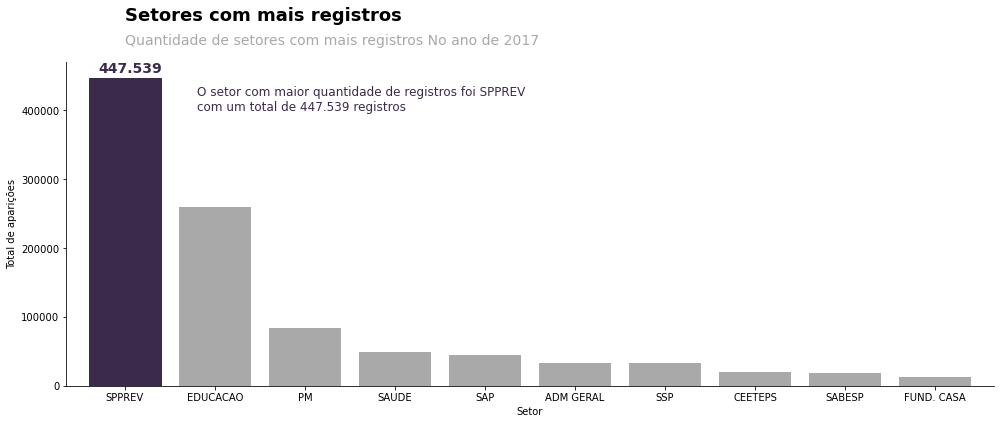

In [267]:
# cores
azul = '#3c2a4d'
cinza = '#a9a9a9'

# Criando os Subplots
fig, ax = plt.subplots(figsize=(14,6))
setor_mais_aparente.plot(kind='bar', width = 0.8, ax=ax, color=cinza)

# Definindo os Labels 
ax.set_ylabel('Total de aparições')
ax.set_xlabel('Setor')
ax.get_legend().remove()

# Removendo o grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0,530000,
        "Setores com mais registros",
        fontsize=18,
        color='black',
        weight='bold')

# Subtítulo
plt.text(0,495000,
        "Quantidade de setores com mais registros "
        "No ano de 2017",
        fontsize=14,
        color=cinza)

# Texto em destaque
plt.text(0.8, 400000,
        "O setor com maior quantidade de registros foi SPPREV\n"
        "com um total de 447.539 registros",
        fontsize=12,
        color=azul)

# Configurando o alinhamento do eixo x
plt.xticks(rotation = 0, ha='center')

# Criando um destaque para o maior valor
ax.get_children()[0].set_color(azul)

plt.text(-0.3, 455000,
        "447.539",
        fontsize=14,
        color=azul,
        weight='bold')

# Plotando o gráfico
plt.tight_layout()

## 06 - Qual o cargo mais presente?

<font size="2" face="Verdana"> Já em consideração ao cargo, o mais recorrente em todo o dataset é o de **PROFESSOR EDUCACAO BASICA II** com um total de **221.178** ocorrências, em segundo lugar temos o de **PROFESSOR EDUCACAO BASICA I** com um total de **128705** ocorrências e em terceiro **BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP** com um total de **91458** ocorrências.
    
</font>

In [158]:
cargo_mais_presente = dataset2['job'].value_counts()[:10]
cargo_mais_presente = pd.DataFrame(cargo_mais_presente).sort_values(by='job', ascending = False)
cargo_mais_presente

,job
PROFESSOR EDUCACAO BASICA II,221178
PROFESSOR EDUCACAO BASICA I,128705
BENEFICIARIO DE SERVIDOR ESTADUAL-IPESP,91458
AGENTE DE ORGANIZACAO ESCOLAR,43123
BENEFICIARIO DA POLICIA MILITAR - CBPM,37725
CABO PM,36849
AUXILIAR SERV. GERAIS,26517
SD 1C PM,25015
OFICIAL ADMINISTRATIVO,23966
3SGT PM,20387


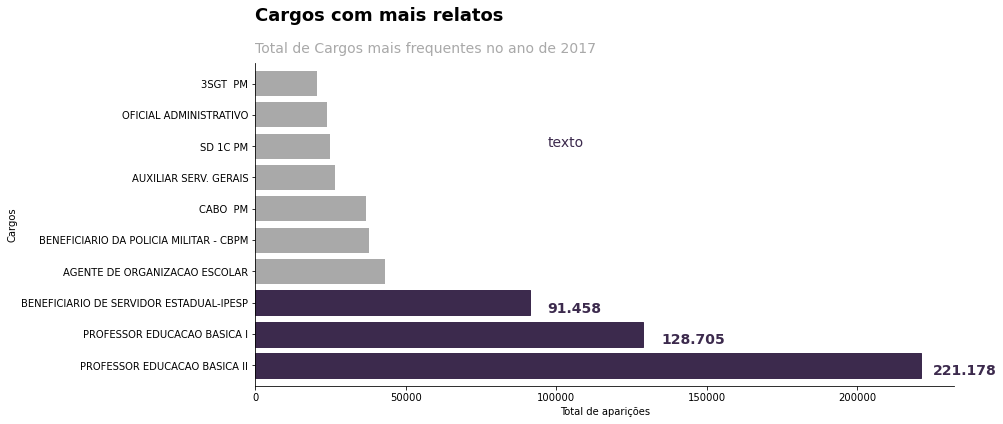

In [220]:
# Criando os Subplots
fig, ax = plt.subplots(figsize=(14,6))
cargo_mais_presente.plot(kind='barh', width=0.8, ax=ax, color=cinza)
ax.set_ylabel("Cargos")
ax.set_xlabel("Total de aparições")
ax.get_legend().remove()

# Remover grid
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Título
plt.text(0,11,
        "Cargos com mais relatos",
        fontsize = 18,
        color='black',
        weight='bold')

# subtítulo
plt.text(0,10,
        "Total de Cargos mais frequentes no ano de 2017",
        fontsize=14,
        color=cinza)

# Valor de destaque
plt.text(225000, -0.3,
        "221.178",
        fontsize=14,
        color=azul,
        weight='bold')

# Valores em destaque
plt.text(135000, 0.7,
        "128.705",
        fontsize=14,
        color=azul,
        weight='bold')

plt.text(97000, 1.7,
        "91.458",
        fontsize=14,
        color=azul,
        weight='bold')

# Texto em destaque
plt.text(97000, 7,
        "texto",
        fontsize=14,
        color=azul)


plt.xticks(rotation = 0, ha = 'center')
ax.get_children()[0].set_color(azul)
ax.get_children()[1].set_color(azul)
ax.get_children()[2].set_color(azul)
plt.tight_layout()

<font size="2" face="Verdana"> Verificando especificamente os cargos da área de educação, ou seja, Professor Educação Básica I e II, é possível observar que com base na quantidade de dados disponíveis, uma grande parte, mais de 32% dos dados, são correspondentes a ambos os cargos, o que mostra o grande volume de professores que exercem sua profissão no estado de **SP**.      </font>

In [279]:
# Correpondência com o Dataset
print('O Cargo de Professor Educação Básica I corresponde à ',end='')
print(f'{len(dataset2[dataset2.job == "PROFESSOR EDUCACAO BASICA I"])} registros, ', end='')
print(f'correspondendo à {(len(dataset2[dataset2.job == "PROFESSOR EDUCACAO BASICA I"]) / dataset.shape[0])*100:.2f}% de todo o dataset')


print('O Cargo de Professor Educação Básica II corresponde à ',end='')
print(f'{len(dataset2[dataset2.job == "PROFESSOR EDUCACAO BASICA II"])} registros, ', end='')
print(f'correspondendo à {(len(dataset2[sdataset2.job == "PROFESSOR EDUCACAO BASICA II"]) / dataset.shape[0])*100:.2f}% de todo o dataset')



O Cargo de Professor Educação Básica I corresponde à 128705 registros, correspondendo à 11.85% de todo o dataset
O Cargo de Professor Educação Básica II corresponde à 221178 registros, correspondendo à 20.37% de todo o dataset


# Conclusão

<font size="2" face="Verdana"> Dados disponibilizados por governos são sempre complexos de tratar e obter insigths, principalmente pelo falo de os sistemas nem sempre estarem integrados, um sistema pode registrar valores de uma forma (Padrão Norte-americano), outro pode fazer um registro no padrão brasileiro, isso torna desafiador o processo. Na base de dados utilizada, dados financeiro nem sempre correspondiam, mas foi possível obter informações interessantes:
    
* A maior quantidade de cargos são os de Professores de Educação Básica I e II, essa é uma categoria que compõe **32.22%** de todo o dataset.
* Foi notado valores muito altos, acima do teto de **R$ 21.631,05** sendo este o salário limite correspondente ao salário do Governado do estado. Muitos aparentam ter sido registrados de forma erronea
* O Setor com maior relevância no Dataset não é o de educação, apesar de o cargo de professor ser o mais frequente, o setor com maior participação é o SPPREV, que remete ao setor de previdência.

Por fim, lembro que a análise em questão tem como objetivo, unico e exlusivamente a prática e estudo de análise de dados.
    
</font>